# Lab 06-1 Softmax Classification
* Softmax를 사용하여분류를 진행합니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input

tf.random.set_seed(0)   # for reproducibility
print(tf.__version__)

2.12.0


In [2]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [3]:
#dataset을 선언합니다.
# dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
# dataset = dataset.repeat().batch(2)

nb_classes = 3 #class의 개수입니다.

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [6]:
#Weight and bias setting
W = tf.Variable(tf.random.normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 1.5110626 ,  0.42292204, -0.41969493],
       [-1.0360372 , -1.2368279 ,  0.47027302],
       [-0.01397489,  1.1888583 ,  0.60253334],
       [ 0.5997111 , -0.7057119 , -0.43297544]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 1.0668802 ,  0.19454929, -0.53082895], dtype=float32)>


In [7]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[6.7622632e-01 5.7505768e-02 2.6626796e-01]
 [8.9231020e-01 9.3884431e-02 1.3805280e-02]
 [9.9711996e-01 2.5964237e-03 2.8364777e-04]
 [9.9732113e-01 2.6285697e-03 5.0274964e-05]
 [7.1394020e-03 1.4758843e-04 9.9271297e-01]
 [9.5985544e-01 1.4678107e-02 2.5466353e-02]
 [4.6822131e-02 1.0678010e-03 9.5211017e-01]
 [1.6258704e-02 2.7375889e-04 9.8346746e-01]], shape=(8, 3), dtype=float32)


In [8]:
# Softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[9.9999917e-01 8.3328007e-07 2.3995774e-08]], shape=(1, 3), dtype=float32)


In [10]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(4.992257, shape=(), dtype=float32)


In [11]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x # x^2
dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [12]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)

        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.0589459 , -0.71503186, -0.34391406],
       [-0.79954565, -1.2183958 ,  2.0179415 ],
       [ 0.44510514, -1.8196821 ,  1.3745769 ],
       [ 0.57818824, -1.9542584 ,  1.37607   ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.32413167, -0.35340217,  0.02927051], dtype=float32)>]


In [14]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.experimental.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            
fit(x_data, y_data)

Loss at epoch 1: 3.229097
Loss at epoch 100: 0.742604
Loss at epoch 200: 0.632741
Loss at epoch 300: 0.569651
Loss at epoch 400: 0.520741
Loss at epoch 500: 0.478546
Loss at epoch 600: 0.440240
Loss at epoch 700: 0.404269
Loss at epoch 800: 0.369471
Loss at epoch 900: 0.334814
Loss at epoch 1000: 0.299420
Loss at epoch 1100: 0.263568
Loss at epoch 1200: 0.237966
Loss at epoch 1300: 0.226124
Loss at epoch 1400: 0.215588
Loss at epoch 1500: 0.205943
Loss at epoch 1600: 0.197083
Loss at epoch 1700: 0.188919
Loss at epoch 1800: 0.181372
Loss at epoch 1900: 0.174379
Loss at epoch 2000: 0.167882


# Prediction Check

In [15]:
sample_data = [[2,1,3,2]] # answer_label [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1)) #index: 2

tf.Tensor([[7.8546471e-04 8.5733227e-02 9.1348124e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [16]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data

tf.Tensor(
[[3.5227627e-06 1.2679758e-03 9.9872845e-01]
 [7.8546471e-04 8.5733227e-02 9.1348118e-01]
 [7.7870105e-08 1.7230780e-01 8.2769209e-01]
 [8.9964271e-07 8.4318644e-01 1.5681270e-01]
 [2.7418661e-01 7.1316946e-01 1.2643901e-02]
 [1.4467269e-01 8.5531479e-01 1.2520270e-05]
 [7.3659474e-01 2.6337504e-01 3.0187090e-05]
 [9.1249591e-01 8.7503560e-02 5.3111677e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


# TensorFlow Sytle

In [26]:
softmax_classifier_model = tf.keras.Sequential([
    Input(shape=([4,])),
    layers.Dense(units=3, use_bias=True, activation='softmax')
])

softmax_classifier_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [27]:
optimizer =  tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
softmax_classifier_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ["accuracy"])

In [28]:
history = softmax_classifier_model.fit(x_data, y_data, epochs=2000, verbose=2)

Epoch 1/2000
1/1 - 0s - loss: 2.9571 - accuracy: 0.2500 - 369ms/epoch - 369ms/step
Epoch 2/2000
1/1 - 0s - loss: 1.9948 - accuracy: 0.3750 - 9ms/epoch - 9ms/step
Epoch 3/2000
1/1 - 0s - loss: 1.6834 - accuracy: 0.3750 - 10ms/epoch - 10ms/step
Epoch 4/2000
1/1 - 0s - loss: 1.3630 - accuracy: 0.2500 - 9ms/epoch - 9ms/step
Epoch 5/2000
1/1 - 0s - loss: 1.2833 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 6/2000
1/1 - 0s - loss: 1.1765 - accuracy: 0.2500 - 8ms/epoch - 8ms/step
Epoch 7/2000
1/1 - 0s - loss: 1.1790 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 8/2000
1/1 - 0s - loss: 1.1315 - accuracy: 0.2500 - 11ms/epoch - 11ms/step
Epoch 9/2000
1/1 - 0s - loss: 1.1371 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 10/2000
1/1 - 0s - loss: 1.0936 - accuracy: 0.2500 - 7ms/epoch - 7ms/step
Epoch 11/2000
1/1 - 0s - loss: 1.1022 - accuracy: 0.6250 - 7ms/epoch - 7ms/step
Epoch 12/2000
1/1 - 0s - loss: 1.0597 - accuracy: 0.2500 - 7ms/epoch - 7ms/step
Epoch 13/2000
1/1 - 0s - loss: 1.0704 -

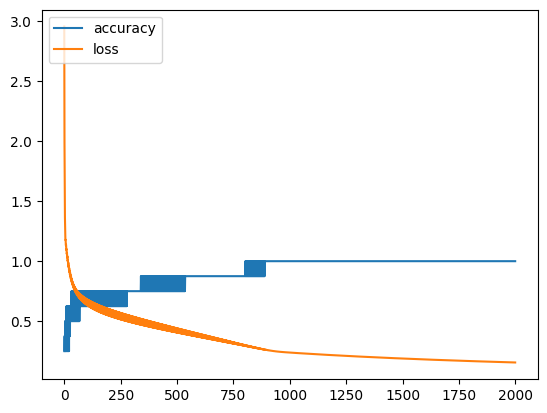

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper left')
plt.show()

In [37]:
loss, acc = softmax_classifier_model.evaluate(x_data, y_data, verbose=1)
print('Loss: {}, Accuracy: {}'.format(loss, acc))

1/1 [==============================] - 0s 47ms/step - loss: 0.1553 - accuracy: 1.0000
Loss: 0.15527379512786865, Accuracy: 1.0


In [41]:
pred = softmax_classifier_model.predict( x_data[3:4] ) 
print(pred.shape)
pred = np.argmax(pred, axis=1)
label = np.argmax(y_data[3:4], axis=1)

print('Prediction : ', pred)
print('Label : ', label)

1/1 [==============================] - 0s 45ms/step
(1, 3)
Prediction :  [1]
Label :  [1]
